In [1]:
import pandas as pd
import seaborn as sns

# Beetlepalooza Beetle Measurement Data

This dataset has images of multiple beetles from each site (the individual beetles will be segmented out). Each image has multiple rows in the measurements CSV (2 per beetle, one representing each of the two measurements performed on the beetles).

In [2]:
df = pd.read_csv("https://huggingface.co/datasets/imageomics/BeetlePalooza/resolve/bbefad05d50ed55da82e99bd330afe12a5fd1d97/BeetleMeasurements.csv", low_memory = False)
df.head()

,Unnamed: 0,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID_,siteID,field_site_name,plotID,user_name,workflow_id
0,1,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraLength,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}",108.115679,1.404100,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652
1,2,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraWidth,Yes,"{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",50.159745,0.651425,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652
2,3,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,2,ElytraLength,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}",118.562220,1.539769,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652
3,4,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,2,ElytraWidth,Yes,"{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",50.328918,0.653622,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652
4,5,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,3,ElytraLength,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}",109.165013,1.417727,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652


We'll want to remove the `Unnamed: 0` column or set it as index (would be good to have some type of UUID for this CSV). `NEON_sampleID_` should be changed to either `NEON_sample_id` or have the trailing underscore removed; need consistency across the "ID" columns.

Remaining column info:
  - `PictureID`: Name of the image: `<sample-barcode>.jpg`. Unique identifier for _group_ images, not for dataset. --- Probably should lowercase this.
  - `scalebar`: Pixel coordinates of the ruler/scalebar in the image.
  - `scale_dist_pix`: Integer. The length in pixels of the scalebar.
  - `individual`: Integer. The beetle in the image to whom the measurements refer. Awaiting confirmation of how they are counted.
  - `structure`: Whether the measurement applies to the length or width of the elytra (`ElytraLength` or `ElytraWidth`, respectively).
  - `lyingstraight`: Whether or not the beetle is "straight" in the image (`Yes` or `No`). Further guidance on this term's meaning would be helpful.
  - `coords_pix`: Pixel coordinates of the line marking the length or width of the elytra (green or purple --confirm which is which). Note that the lines are more than one pixel wide, which is why these coordinates form a rectangle.
  - `dist_pix`: Float. The length or width of the elytra (indicated by `structure`) as measured in pixels.
  - `dist_cm`: Float. The length or width of the elytra (indicated by `structure`) as measured in centimeters using the scalebar (the red line in the reference image denotes the pixel count for 1cm).
  - `scientificName`: Scientific name of the specimen (`<Genus> <species>`).
  - `siteID`: String. Identifier for the site from which the specimens were collected.
  - `field_site_name`: Name of site from which the specimens were collected.
  - `plotID`: Identifier for the plot from which the specimens were collected (`<siteID>_<plot number>`).
  - `user_name`: Name of person inputting the information? (`<first><Last>`) or just their username in the system?
  - `workflow_id`: Integer identifier for the workflow used...??


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39064 entries, 0 to 39063
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       39064 non-null  int64  
 1   PictureID        39064 non-null  object 
 2   scalebar         39064 non-null  object 
 3   scale_dist_pix   39064 non-null  float64
 4   individual       39064 non-null  int64  
 5   structure        39064 non-null  object 
 6   lyingstraight    39064 non-null  object 
 7   coords_pix       39064 non-null  object 
 8   dist_pix         39064 non-null  float64
 9   dist_cm          39064 non-null  float64
 10  scientificName   39030 non-null  object 
 11  NEON_sampleID_   39064 non-null  object 
 12  siteID           39064 non-null  object 
 13  field_site_name  39064 non-null  object 
 14  plotID           39064 non-null  object 
 15  user_name        39064 non-null  object 
 16  workflow_id      39064 non-null  int64  
dtypes: float64(3

We have 34 entries (presumably 17 individuals) without `scientificName`. Everything else is completely filled in. Should check how many images that is and overall info. Everything else is completely filled.

In [4]:
df.nunique()

Unnamed: 0         39064
PictureID            577
scalebar            1045
scale_dist_pix       327
individual            99
structure              2
lyingstraight          2
coords_pix         38724
dist_pix            4198
dist_cm            31566
scientificName        85
NEON_sampleID_       576
siteID                30
field_site_name       43
plotID               144
user_name              3
workflow_id            5
dtype: int64

We will need to count uniqueness as pair of `PictureID` + `individual` to get count of individuals.

In [5]:
def get_genus(sci_name):
    if type(sci_name) == float:
        return sci_name
    return sci_name.split(" ")[0]

df["genus"] = df["scientificName"].apply(get_genus)
df["genus"].nunique()

36

There are 85 different species among 36 genera.

Now let's check on the missing `scientificName`.

In [6]:
missing_sci = df.loc[df.scientificName.isna()].copy()
missing_sci.nunique()

Unnamed: 0         34
PictureID           1
scalebar            1
scale_dist_pix      1
individual         17
structure           2
lyingstraight       2
coords_pix         34
dist_pix           32
dist_cm            32
scientificName      0
NEON_sampleID_      1
siteID              1
field_site_name     1
plotID              1
user_name           1
workflow_id         1
genus               0
dtype: int64

It is just one image with 17 individuals.

In [7]:
missing_sci.sample()

,Unnamed: 0,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID_,siteID,field_site_name,plotID,user_name,workflow_id,genus
26947,26948,MOAB_001.S.20180724.jpg,"{""x1"": 1122, ""y1"": 368, ""x2"": 1210, ""y2"": 369}",88.005682,17,ElytraWidth,No,"{""x1"": 1767, ""y1"": 1163, ""x2"": 1753, ""y2"": 1192}",32.202484,0.365914,NaN,MOAB_001.S.20180724,MOAB,Moab NEON,MOAB_001,IsaFluck,22073,NaN


Sometimes the `PictureID` is the `NEON_sampleID_`.

In [8]:
def generate_indivdiual_id(pictureID, individual):
    return pictureID.split(".jpg")[0] + "_" + str(individual)

df["individualID"] = df.apply(lambda x: generate_indivdiual_id(x["PictureID"], x["individual"]), axis = 1)
df["individualID"].nunique()

11104

But there should be 19,532 since there are 39,064 entries and should have two per individual...well `coords_pix` is not entirely unique...

In [9]:
df.sample()

,Unnamed: 0,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID_,siteID,field_site_name,plotID,user_name,workflow_id,genus,individualID
14866,14867,A00000046081.jpg,"{""x1"": 664, ""y1"": 285, ""x2"": 746, ""y2"": 289}",82.097503,22,ElytraLength,Yes,"{""x1"": 1010, ""y1"": 895, ""x2"": 1100, ""y2"": 944}",102.474387,1.248203,Carabus goryi,MLBS_009.S.20180619.CARGOR.01,MLBS,Mountain Lake Biological Station NEON,MLBS_009,ishachinniah,21840,Carabus,A00000046081_22


Let's remove that index column and check for duplication.

In [10]:
df = df[list(df.columns)[1:]].copy()
df["duplicate"] = df.duplicated(keep = "first")
df["duplicate"].value_counts()

duplicate
False    39064
Name: count, dtype: int64

Let's try ignoring the `user_name` to check.

In [11]:
df["duplicate"] = df.duplicated(subset = [col for col in list(df.columns) if col != "user_name"], keep = "first")
df["duplicate"].value_counts()

duplicate
False    39064
Name: count, dtype: int64

Let's check the `coords_pix` that are duplicated.

In [12]:
df["coords_dupe"] = df.duplicated(subset = ["coords_pix"], keep = False)
df["coords_dupe"].value_counts()

coords_dupe
False    38388
True       676
Name: count, dtype: int64

Still not enough to account for the difference, but let's take a sample of them.

In [13]:
df.loc[df["coords_dupe"]].head(7)

,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID_,siteID,field_site_name,plotID,user_name,workflow_id,genus,individualID,duplicate,coords_dupe
88,A00000033585.jpg,"{""x1"": 781, ""y1"": 253, ""x2"": 891, ""y2"": 254}",110.004545,6,ElytraLength,Yes,"{""x1"": 1009, ""y1"": 370, ""x2"": 1026, ""y2"": 433}",65.253352,0.593188,Synuchus impunctatus,HARV_008.20180814.SYNIMP.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_008,ishachinniah,21652,Synuchus,A00000033585_6,False,True
139,A00000033585.jpg,"{""x1"": 782, ""y1"": 253, ""x2"": 886, ""y2"": 254}",104.004808,15,ElytraWidth,Yes,"{""x1"": 1036, ""y1"": 828, ""x2"": 1032, ""y2"": 856}",28.284271,0.271952,Synuchus impunctatus,HARV_008.20180814.SYNIMP.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_008,IsaFluck,21652,Synuchus,A00000033585_15,False,True
152,A00000033585.jpg,"{""x1"": 666, ""y1"": 254, ""x2"": 781, ""y2"": 255}",115.004348,6,ElytraLength,Yes,"{""x1"": 1009, ""y1"": 370, ""x2"": 1026, ""y2"": 433}",65.253352,0.567399,Synuchus impunctatus,HARV_008.20180814.SYNIMP.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_008,rileywolcheski,21652,Synuchus,A00000033585_6,False,True
171,A00000033585.jpg,"{""x1"": 666, ""y1"": 254, ""x2"": 781, ""y2"": 255}",115.004348,15,ElytraWidth,Yes,"{""x1"": 1036, ""y1"": 828, ""x2"": 1032, ""y2"": 856}",28.284271,0.245941,Synuchus impunctatus,HARV_008.20180814.SYNIMP.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_008,rileywolcheski,21652,Synuchus,A00000033585_15,False,True
211,A00000033652.jpg,"{""x1"": 933, ""y1"": 298, ""x2"": 1056, ""y2"": 295}",123.036580,13,ElytraWidth,No,"{""x1"": 538, ""y1"": 866, ""x2"": 575, ""y2"": 861}",37.336309,0.303457,Synuchus impunctatus,HARV_006.20180911.SYNIMP.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_006,IsaFluck,21652,Synuchus,A00000033652_13,False,True
245,A00000033652.jpg,"{""x1"": 931, ""y1"": 299, ""x2"": 1057, ""y2"": 297}",126.015872,13,ElytraWidth,Yes,"{""x1"": 538, ""y1"": 866, ""x2"": 575, ""y2"": 861}",37.336309,0.296283,Synuchus impunctatus,HARV_006.20180911.SYNIMP.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_006,ishachinniah,21652,Synuchus,A00000033652_13,False,True
322,A00000032963.jpg,"{""x1"": 476, ""y1"": 210, ""x2"": 554, ""y2"": 211}",78.006410,18,ElytraLength,No,"{""x1"": 1443, ""y1"": 904, ""x2"": 1443, ""y2"": 1002}",98.000000,1.256307,Carabus goryi,HARV_005.20180814.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_005,IsaFluck,21652,Carabus,A00000032963_18,False,True


Based on comparing a few of these, the duplication seems to be caused by variations in the person inputting the data. They match the line coordinates, but the scalebar coordinates are slightly different (in one case just which is 1 vs 2) and the cm calculation differs (despite matching pixel distance). We also see here a disagreement on `lyingstraight` here.

In [14]:
for username in list(df.user_name.unique()):
    temp = df.loc[df["user_name"] == username].copy()
    print(f"{username} annotated {temp.PictureID.nunique()} images in {temp.shape[0]} entries, with {temp.individualID.nunique()} unique individuals (picID + individual)")

IsaFluck annotated 577 images in 22918 entries, with 11078 unique individuals (picID + individual)
ishachinniah annotated 235 images in 8122 entries, with 4053 unique individuals (picID + individual)
rileywolcheski annotated 234 images in 8024 entries, with 4004 unique individuals (picID + individual)


Looks like `IsaFluck` annotated all images, but not all individuals. The other two people each annotated about half. Based on the numbers per annotator there are at least 2 images that were looked at by 3 people (if only 2, then all other images were reviewed by 2 people).

They all seem to have more than two rows per individual (as in a handful of individuals got 3+ entries for each annotator). Here I'm counting individuals using the `PictureID` (minus the `.jpg`) plus the `individual` number from the image.

Some inconsistency could also come from different numbering schemes, though that would suggest many more issues.

In [15]:
df["dupeID"] = df.duplicated(subset = ["individualID"], keep = "first")

individual_count_df = df.loc[~df["dupeID"]].copy()

individual_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11104 entries, 0 to 39062
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PictureID        11104 non-null  object 
 1   scalebar         11104 non-null  object 
 2   scale_dist_pix   11104 non-null  float64
 3   individual       11104 non-null  int64  
 4   structure        11104 non-null  object 
 5   lyingstraight    11104 non-null  object 
 6   coords_pix       11104 non-null  object 
 7   dist_pix         11104 non-null  float64
 8   dist_cm          11104 non-null  float64
 9   scientificName   11087 non-null  object 
 10  NEON_sampleID_   11104 non-null  object 
 11  siteID           11104 non-null  object 
 12  field_site_name  11104 non-null  object 
 13  plotID           11104 non-null  object 
 14  user_name        11104 non-null  object 
 15  workflow_id      11104 non-null  int64  
 16  genus            11087 non-null  object 
 17  individualID     

<Axes: xlabel='Count', ylabel='genus'>

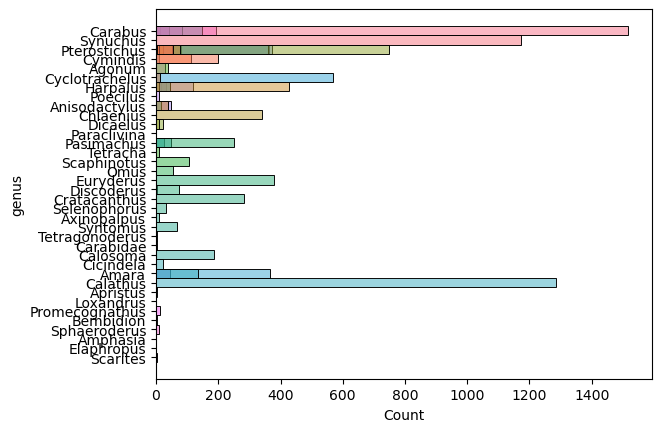

In [16]:
sns.histplot(individual_count_df, y = "genus", hue = "scientificName", legend = False)

### Add `file_name` Column for HF

Add the `file_name` column with relative path from root of directory to the images for the dataset viewer. It should be `group_images/<PictureID>`.

In [17]:
df["file_name"] = "group_images/" + df["PictureID"]
df["file_name"].nunique()

577

### Quick Look at Size Comparisons

Let's just take the first measurement for length and width of the elytra (in cm) to add for a column on the individual subset (curious about range). This we won't worry about saving since the individual CSV is going to be made after we address the annotation inconsistencies.
 - Next step will be to compare the measurements for each individual and see what the variation is across the estimated 2-3 annotations per individual.

In [18]:
for id in list(individual_count_df["individualID"]):
    meas_temp = df.loc[df["individualID"] == id].copy()
    
    elytra_length = meas_temp.loc[meas_temp["structure"] == "ElytraLength", "dist_cm"].values[0]
    elytra_width = meas_temp.loc[meas_temp["structure"] == "ElytraWidth", "dist_cm"].values[0]
    
    individual_count_df.loc[individual_count_df["individualID"] == id, "elytraLength"] = elytra_length
    individual_count_df.loc[individual_count_df["individualID"] == id, "elytraWidth"] = elytra_width

<Axes: xlabel='elytraLength', ylabel='elytraWidth'>

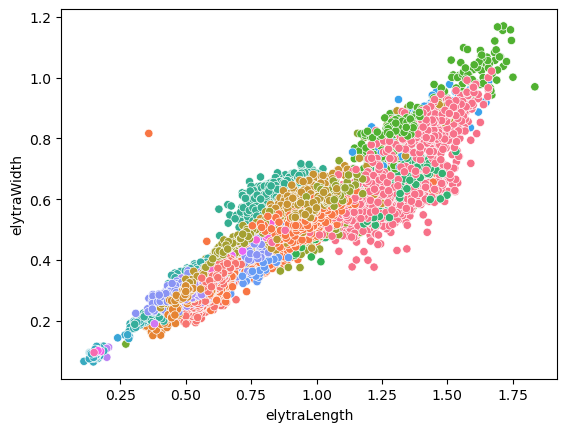

In [19]:
sns.scatterplot(individual_count_df, x = "elytraLength", y = "elytraWidth", hue = "genus", legend = False)

Comparing annotations for individuals will be particularly interesting (there's one big outlier here)...who is that guy?

In [20]:
individual_count_df.loc[(individual_count_df["elytraWidth"] > .8) & (individual_count_df["elytraLength"] < .5)]

,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,...,plotID,user_name,workflow_id,genus,individualID,duplicate,coords_dupe,dupeID,elytraLength,elytraWidth
14542,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraLength,Yes,"{""x1"": 1575, ""y1"": 797, ""x2"": 1570, ""y2"": 830}",33.376639,0.358806,Pterostichus lachrymosus,...,MLBS_009,IsaFluck,21840,Pterostichus,A00000046078_10,False,False,False,0.358806,0.81652


In [21]:
df.loc[df["individualID"] == "A00000046078_10"]

,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,...,field_site_name,plotID,user_name,workflow_id,genus,individualID,duplicate,coords_dupe,dupeID,file_name
14542,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraLength,Yes,"{""x1"": 1575, ""y1"": 797, ""x2"": 1570, ""y2"": 830}",33.376639,0.358806,Pterostichus lachrymosus,...,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,A00000046078_10,False,False,False,group_images/A00000046078.jpg
14543,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraWidth,Yes,"{""x1"": 1574, ""y1"": 812, ""x2"": 1649, ""y2"": 824}",75.953933,0.816520,Pterostichus lachrymosus,...,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,A00000046078_10,False,False,True,group_images/A00000046078.jpg
14564,A00000046078.jpg,"{""x1"": 1242, ""y1"": 308, ""x2"": 1338, ""y2"": 306}",96.020831,10,ElytraLength,No,"{""x1"": 1575, ""y1"": 813, ""x2"": 1648, ""y2"": 823}",73.681748,0.767352,Pterostichus lachrymosus,...,Mountain Lake Biological Station NEON,MLBS_009,ishachinniah,21840,Pterostichus,A00000046078_10,False,False,True,group_images/A00000046078.jpg
14565,A00000046078.jpg,"{""x1"": 1242, ""y1"": 308, ""x2"": 1338, ""y2"": 306}",96.020831,10,ElytraWidth,No,"{""x1"": 1568, ""y1"": 827, ""x2"": 1572, ""y2"": 798}",29.274562,0.304877,Pterostichus lachrymosus,...,Mountain Lake Biological Station NEON,MLBS_009,ishachinniah,21840,Pterostichus,A00000046078_10,False,False,True,group_images/A00000046078.jpg
14586,A00000046078.jpg,"{""x1"": 948, ""y1"": 316, ""x2"": 1048, ""y2"": 313}",100.044990,10,ElytraLength,Yes,"{""x1"": 1575, ""y1"": 814, ""x2"": 1648, ""y2"": 824}",73.681748,0.736486,Pterostichus lachrymosus,...,Mountain Lake Biological Station NEON,MLBS_009,rileywolcheski,21840,Pterostichus,A00000046078_10,False,False,True,group_images/A00000046078.jpg
14587,A00000046078.jpg,"{""x1"": 948, ""y1"": 316, ""x2"": 1048, ""y2"": 313}",100.044990,10,ElytraWidth,Yes,"{""x1"": 1574, ""y1"": 799, ""x2"": 1570, ""y2"": 830}",31.256999,0.312429,Pterostichus lachrymosus,...,Mountain Lake Biological Station NEON,MLBS_009,rileywolcheski,21840,Pterostichus,A00000046078_10,False,False,True,group_images/A00000046078.jpg


Ahh, `A00000046078_10` was annotated 3 times and had length and width transposed for one of the measurements! (likely just the one and the other two are correct, since they're generally longer than wide---the width isn't at the widest point)


Big note to address the annotations!!


### Save updated CSV with 3 new columns

In [22]:
df.columns

Index(['PictureID', 'scalebar', 'scale_dist_pix', 'individual', 'structure',
       'lyingstraight', 'coords_pix', 'dist_pix', 'dist_cm', 'scientificName',
       'NEON_sampleID_', 'siteID', 'field_site_name', 'plotID', 'user_name',
       'workflow_id', 'genus', 'individualID', 'duplicate', 'coords_dupe',
       'dupeID', 'file_name'],
      dtype='object')

We'll save the column rename until after a conversation with the team, but let's save this updated copy (without the duplicate markers).

In [23]:
cols_to_keep = [col for col in list(df.columns) if col not in ['duplicate', 'coords_dupe', 'dupeID']]
df[cols_to_keep].to_csv("../data/BeetleMeasurements.csv", index = False)

## Re-open to Add Species and Update Column Names

We'll add a species column to more easily identify those labeled only to the genus level. Additionally, we will standardize the column names: ID values will be camelCase and we'll set the remainder with underscores (there's a bit of variety, but NEON seems to use camelCase for the IDs (location & type of measurement): https://www.neonscience.org/data-samples/data-management/data-formats-conventions).

In [2]:
df = pd.read_csv("https://huggingface.co/datasets/imageomics/BeetlePalooza/resolve/190cfc9c71b813b8faa338d251d3d02ee8dc14a9/BeetleMeasurements.csv", low_memory = False)
df.head()

,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID_,siteID,field_site_name,plotID,user_name,workflow_id,genus,individualID,file_name
0,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraLength,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}",108.115679,1.404100,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_1,group_images/A00000032929.jpg
1,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraWidth,Yes,"{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",50.159745,0.651425,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_1,group_images/A00000032929.jpg
2,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,2,ElytraLength,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}",118.562220,1.539769,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_2,group_images/A00000032929.jpg
3,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,2,ElytraWidth,Yes,"{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",50.328918,0.653622,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_2,group_images/A00000032929.jpg
4,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,3,ElytraLength,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}",109.165013,1.417727,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_3,group_images/A00000032929.jpg


In [3]:
import numpy as np

In [4]:
longer_sp_names = []

def get_species(sciName):
    if (type(sciName) != float) and ("sp." not in sciName):
        names = sciName.split(" ")
        if len(names) == 2:
            return(names[1])
        elif len(names) > 2:
            longer_sp_names.append(sciName)
            genus_ = names[0] + " "
            return sciName.split(sep = genus_)[1]
    return np.nan

In [5]:
df["species"] = df["scientificName"].apply(get_species)
print(f"Among our 36 unique genera we have {df['species'].nunique()} unique species")
print(f"There are {len(set(longer_sp_names))} species labels longer than one word; their scientific names are: {set(longer_sp_names)}")
print(f"We have {df.loc[df['species'].isna(), 'individualID'].nunique()} individuals not labeled to the species level; {df.loc[(df['species'].isna()) & (df['scientificName'].isna()), 'individualID'].nunique()} of them don't even have a scientific name label.")

Among our 36 unique genera we have 78 unique species
There are 6 species labels longer than one word; their scientific names are: {'Dicaelus dilatatus sinuatus', 'Carabus maeander maeander', 'Pterostichus melanarius melanarius', 'Dicaelus furvus furvus', 'Carabus nemoralis nemoralis', 'Pterostichus acutipes acutipes'}
We have 27 individuals not labeled to the species level; 17 of them don't even have a scientific name label.


In [6]:
df.loc[(df["species"].isna()),"scientificName"].value_counts()


scientificName
Paraclivina sp.                6
Pterostichus (Abacidus) sp.    6
Carabidae sp.                  6
Discoderus sp.                 6
Apristus sp.                   2
Loxandrus sp.                  2
Name: count, dtype: int64

In [7]:
"Abacidus" in list(df["genus"].unique())

False

`Abacidus` seems to be a subgenus of `Pterostichus` ([ref](https://bugguide.net/node/view/1740293)). Those counts seem a bit low for the number of individuals in images...

In [8]:
"sp" in list(df["species"].unique())

False

In [9]:
"(" in list(df["species"].unique())

False

In [10]:
df["species"].isna().sum()

62

Total of 62 entries missing species, but it's only 27 individuals (it would seem), and we got one subgenus.

In [11]:
df.sample(7)

,PictureID,scalebar,scale_dist_pix,individual,structure,lyingstraight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID_,siteID,field_site_name,plotID,user_name,workflow_id,genus,individualID,file_name,species
13876,A00000012920.jpg,"{""x1"": 386, ""y1"": 283, ""x2"": 470, ""y2"": 281}",84.023806,28,ElytraLength,Yes,"{""x1"": 1203, ""y1"": 1059, ""x2"": 1301, ""y2"": 1093}",103.730420,1.234536,Carabus goryi,MLBS_009.E.20180508.CARGOR.01,MLBS,Mountain Lake Biological Station NEON,MLBS_009,ishachinniah,21840,Carabus,A00000012920_28,group_images/A00000012920.jpg,goryi
1610,A00000033624.jpg,"{""x1"": 1092, ""y1"": 292, ""x2"": 1216, ""y2"": 293}",124.004032,2,ElytraLength,Yes,"{""x1"": 842, ""y1"": 447, ""x2"": 843, ""y2"": 501}",54.009258,0.435544,Cymindis neglecta,BART_031.20180808.CYMNEG.01,BART,Bartlett Experimental Forest NEON,BART_031,IsaFluck,21652,Cymindis,A00000033624_2,group_images/A00000033624.jpg,neglecta
12273,A00000046180.jpg,"{""x1"": 803, ""y1"": 262, ""x2"": 884, ""y2"": 262}",81.000000,42,ElytraWidth,Yes,"{""x1"": 1368, ""y1"": 828, ""x2"": 1403, ""y2"": 827}",35.014283,0.432275,Pterostichus lachrymosus,MLBS_009.20180828.PTELAC2.01,MLBS,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,A00000046180_42,group_images/A00000046180.jpg,lachrymosus
32950,A00000008962.jpg,"{""x1"": 1135, ""y1"": 303, ""x2"": 1221, ""y2"": 303}",86.000000,9,ElytraLength,Yes,"{""x1"": 1640, ""y1"": 450, ""x2"": 1646, ""y2"": 531}",81.221918,0.944441,Pterostichus melanarius melanarius,STEI_001.20180710.PTEMEL.01,STEI,Steigerwaldt-Chequamegon NEON,STEI_001,IsaFluck,22073,Pterostichus,A00000008962_9,group_images/A00000008962.jpg,melanarius melanarius
33793,A00000051524.jpg,"{""x1"": 1191, ""y1"": 286, ""x2"": 1285, ""y2"": 286}",94.000000,6,ElytraWidth,Yes,"{""x1"": 1640, ""y1"": 379, ""x2"": 1636, ""y2"": 418}",39.204592,0.417070,Anisodactylus rusticus,STER_035.20180614.ANIRUS.01,STER,North Sterling NEON,STER_035,IsaFluck,22073,Anisodactylus,A00000051524_6,group_images/A00000051524.jpg,rusticus
3383,A00000033639.jpg,"{""x1"": 978, ""y1"": 302, ""x2"": 1108, ""y2"": 302}",130.000000,12,ElytraWidth,Yes,"{""x1"": 1294, ""y1"": 752, ""x2"": 1296, ""y2"": 781}",29.068884,0.223607,Synuchus impunctatus,BART_031.20180808.SYNIMP.01,BART,Bartlett Experimental Forest NEON,BART_031,IsaFluck,21652,Synuchus,A00000033639_12,group_images/A00000033639.jpg,impunctatus
8613,A00000046092.jpg,"{""x1"": 864, ""y1"": 243, ""x2"": 967, ""y2"": 247}",103.077641,3,ElytraWidth,Yes,"{""x1"": 1061, ""y1"": 433, ""x2"": 1119, ""y2"": 428}",58.215118,0.564770,Carabus goryi,GRSM_022.20180626.CARGOR.01,GRSM,Great Smoky Mountains National Park NEON,GRSM_022,ishachinniah,21840,Carabus,A00000046092_3,group_images/A00000046092.jpg,goryi


In [12]:
df.columns

Index(['PictureID', 'scalebar', 'scale_dist_pix', 'individual', 'structure',
       'lyingstraight', 'coords_pix', 'dist_pix', 'dist_cm', 'scientificName',
       'NEON_sampleID_', 'siteID', 'field_site_name', 'plotID', 'user_name',
       'workflow_id', 'genus', 'individualID', 'file_name', 'species'],
      dtype='object')

In [13]:
df.rename(columns = {'PictureID': 'pictureID',
                     'scale_dist_pix': 'cm_pix',        #this is number of pixels in a cm on the scalebar
                     'lyingstraight': 'lying_straight',
                     'NEON_sampleID_': 'NEON_sampleID',
                     'workflow_id': 'workflowID',
                     'field_site_name': 'site_name'
                     },
          inplace = True)
df.head(2)

,pictureID,scalebar,cm_pix,individual,structure,lying_straight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID,siteID,site_name,plotID,user_name,workflowID,genus,individualID,file_name,species
0,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraLength,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}",108.115679,1.404100,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_1,group_images/A00000032929.jpg,goryi
1,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraWidth,Yes,"{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",50.159745,0.651425,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,A00000032929_1,group_images/A00000032929.jpg,goryi


Now let's just move `species` to follow `genus` and we'll save this updated CSV.

In [14]:
col_list = list(df.columns)[:-1]
col_list.insert(-2, "species")
col_list

['pictureID',
 'scalebar',
 'cm_pix',
 'individual',
 'structure',
 'lying_straight',
 'coords_pix',
 'dist_pix',
 'dist_cm',
 'scientificName',
 'NEON_sampleID',
 'siteID',
 'site_name',
 'plotID',
 'user_name',
 'workflowID',
 'genus',
 'species',
 'individualID',
 'file_name']

In [15]:
df[col_list].head(2)

,pictureID,scalebar,cm_pix,individual,structure,lying_straight,coords_pix,dist_pix,dist_cm,scientificName,NEON_sampleID,siteID,site_name,plotID,user_name,workflowID,genus,species,individualID,file_name
0,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraLength,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}",108.115679,1.404100,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_1,group_images/A00000032929.jpg
1,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraWidth,Yes,"{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",50.159745,0.651425,Carabus goryi,HARV_001.20180605.CARGOR.01,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_1,group_images/A00000032929.jpg


In [16]:
df[col_list].to_csv("../data/BeetleMeasurements.csv", index = False)

Quick check, what's the scientific name of our sample image (use the image on [GitHub](https://github.com/Imageomics/BeetlePalooza-2024/blob/main/BeetleImage-A00000046094.jpg))?

In [18]:
df.loc[df["pictureID"] == "A00000046094.jpg", "scientificName"].values[0]

'Carabus goryi'